In [4]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
    --------------------------------------- 0.8/39.5 MB 1.4 MB/s eta 0:00:28
   - -------------------------------------- 1.0/39.5 MB 1.4 MB/s eta 0:00:28
   - -------------------------------------- 1.3/39.5 MB 1.5 MB/s eta 0:00:26
   - -------------------------------------- 1.6/39.5 MB 1.6 MB/s eta 0:00:25
   -- ------------------------------------- 2.1/39.5 MB 1.5 MB/s eta 0:00:25
   -- ------------------------------------- 2.1/39.5 MB 1.5 MB/s eta 0:00:25
   -- ------------------------------------- 2.4/39.5 MB 1.4 MB/s eta 0:00:27
   -- ------------------------------------- 2.9/39.5 MB 1.4 MB/s eta 0:00:26
   --- ------------------------------------ 3.1/39.5 MB 1.4 MB/s eta 0:00:26
   --- ------------------------------------ 3.1/39.5 MB 1.4 MB/s eta 0:00:26
   --- -------------

In [1]:
!pip install numpy
!pip install seaborn
!pip install scikit-image



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread


In [6]:
pip install kagglehub

  Using cached kagglehub-0.3.10-py3-none-any.whl.metadata (31 kB)
Using cached kagglehub-0.3.10-py3-none-any.whl (63 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\diyaa\.cache\kagglehub\datasets\nazmul0087\ct-kidney-dataset-normal-cyst-tumor-and-stone\versions\1


In [8]:
from pathlib import Path

# Define path to the data directory (use raw string `r""` or forward slashes `/`)
data_dir = Path(r'C:\Users\diyaa\.cache\kagglehub\datasets\nazmul0087\ct-kidney-dataset-normal-cyst-tumor-and-stone\versions\1\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone')

# Path to train directory
train_dir = data_dir  # No need to append same folder again

print("Train directory:", train_dir)


Train directory: C:\Users\diyaa\.cache\kagglehub\datasets\nazmul0087\ct-kidney-dataset-normal-cyst-tumor-and-stone\versions\1\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone


In [9]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'Normal'
Cyst_cases_dir = train_dir / 'Cyst'
Stone_cases_dir = train_dir / 'Stone'
Tumor_cases_dir = train_dir / 'Tumor'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpg')
Cyst_cases = Cyst_cases_dir.glob('*.jpg')
Stone_cases = Stone_cases_dir.glob('*.jpg')
Tumor_cases = Tumor_cases_dir.glob('*.jpg')


# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []


# Go through all the Cyst_cases . The label for these cases will be 1
for img in Cyst_cases:
    train_data.append((img, 0))
    # Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,1))

# Go through all the normal cases. The label for these cases will be 0
for img in Stone_cases:
    train_data.append((img,2))

# Go through all the Tumor_cases . The label for these cases will be 1
for img in Tumor_cases:
    train_data.append((img, 3))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,C:\Users\diyaa\.cache\kagglehub\datasets\nazmu...,3
1,C:\Users\diyaa\.cache\kagglehub\datasets\nazmu...,0
2,C:\Users\diyaa\.cache\kagglehub\datasets\nazmu...,1
3,C:\Users\diyaa\.cache\kagglehub\datasets\nazmu...,1
4,C:\Users\diyaa\.cache\kagglehub\datasets\nazmu...,2


In [10]:
train_data['label'].unique()

array([3, 0, 1, 2], dtype=int64)

In [11]:
train_data.shape

(12446, 2)

label
1    5077
0    3709
3    2283
2    1377
Name: count, dtype: int64


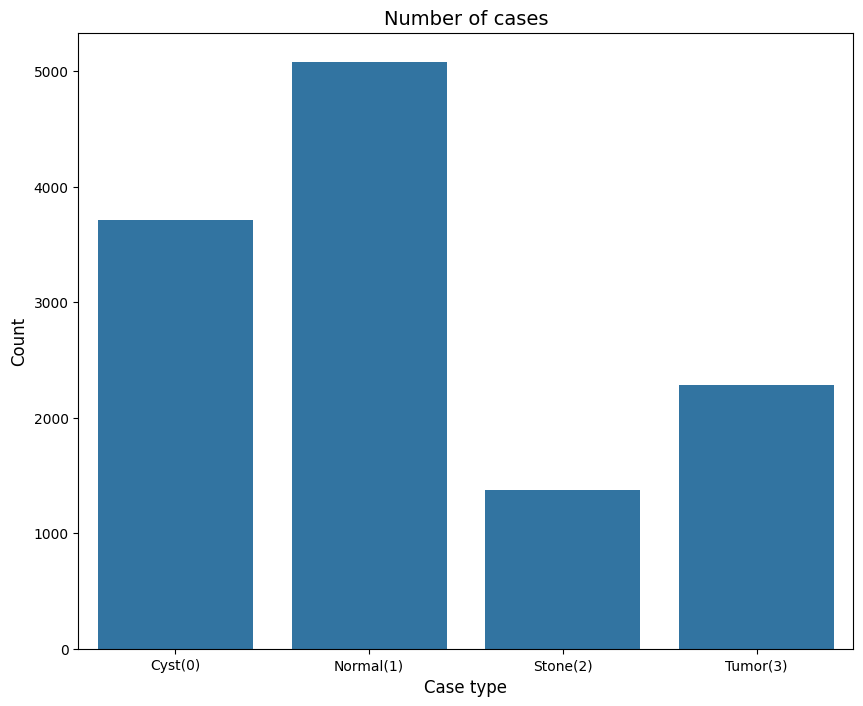

In [12]:
# Get the counts for each class
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Cyst(0)','Normal(1)', 'Stone(2)', 'Tumor(3)'])
plt.show()

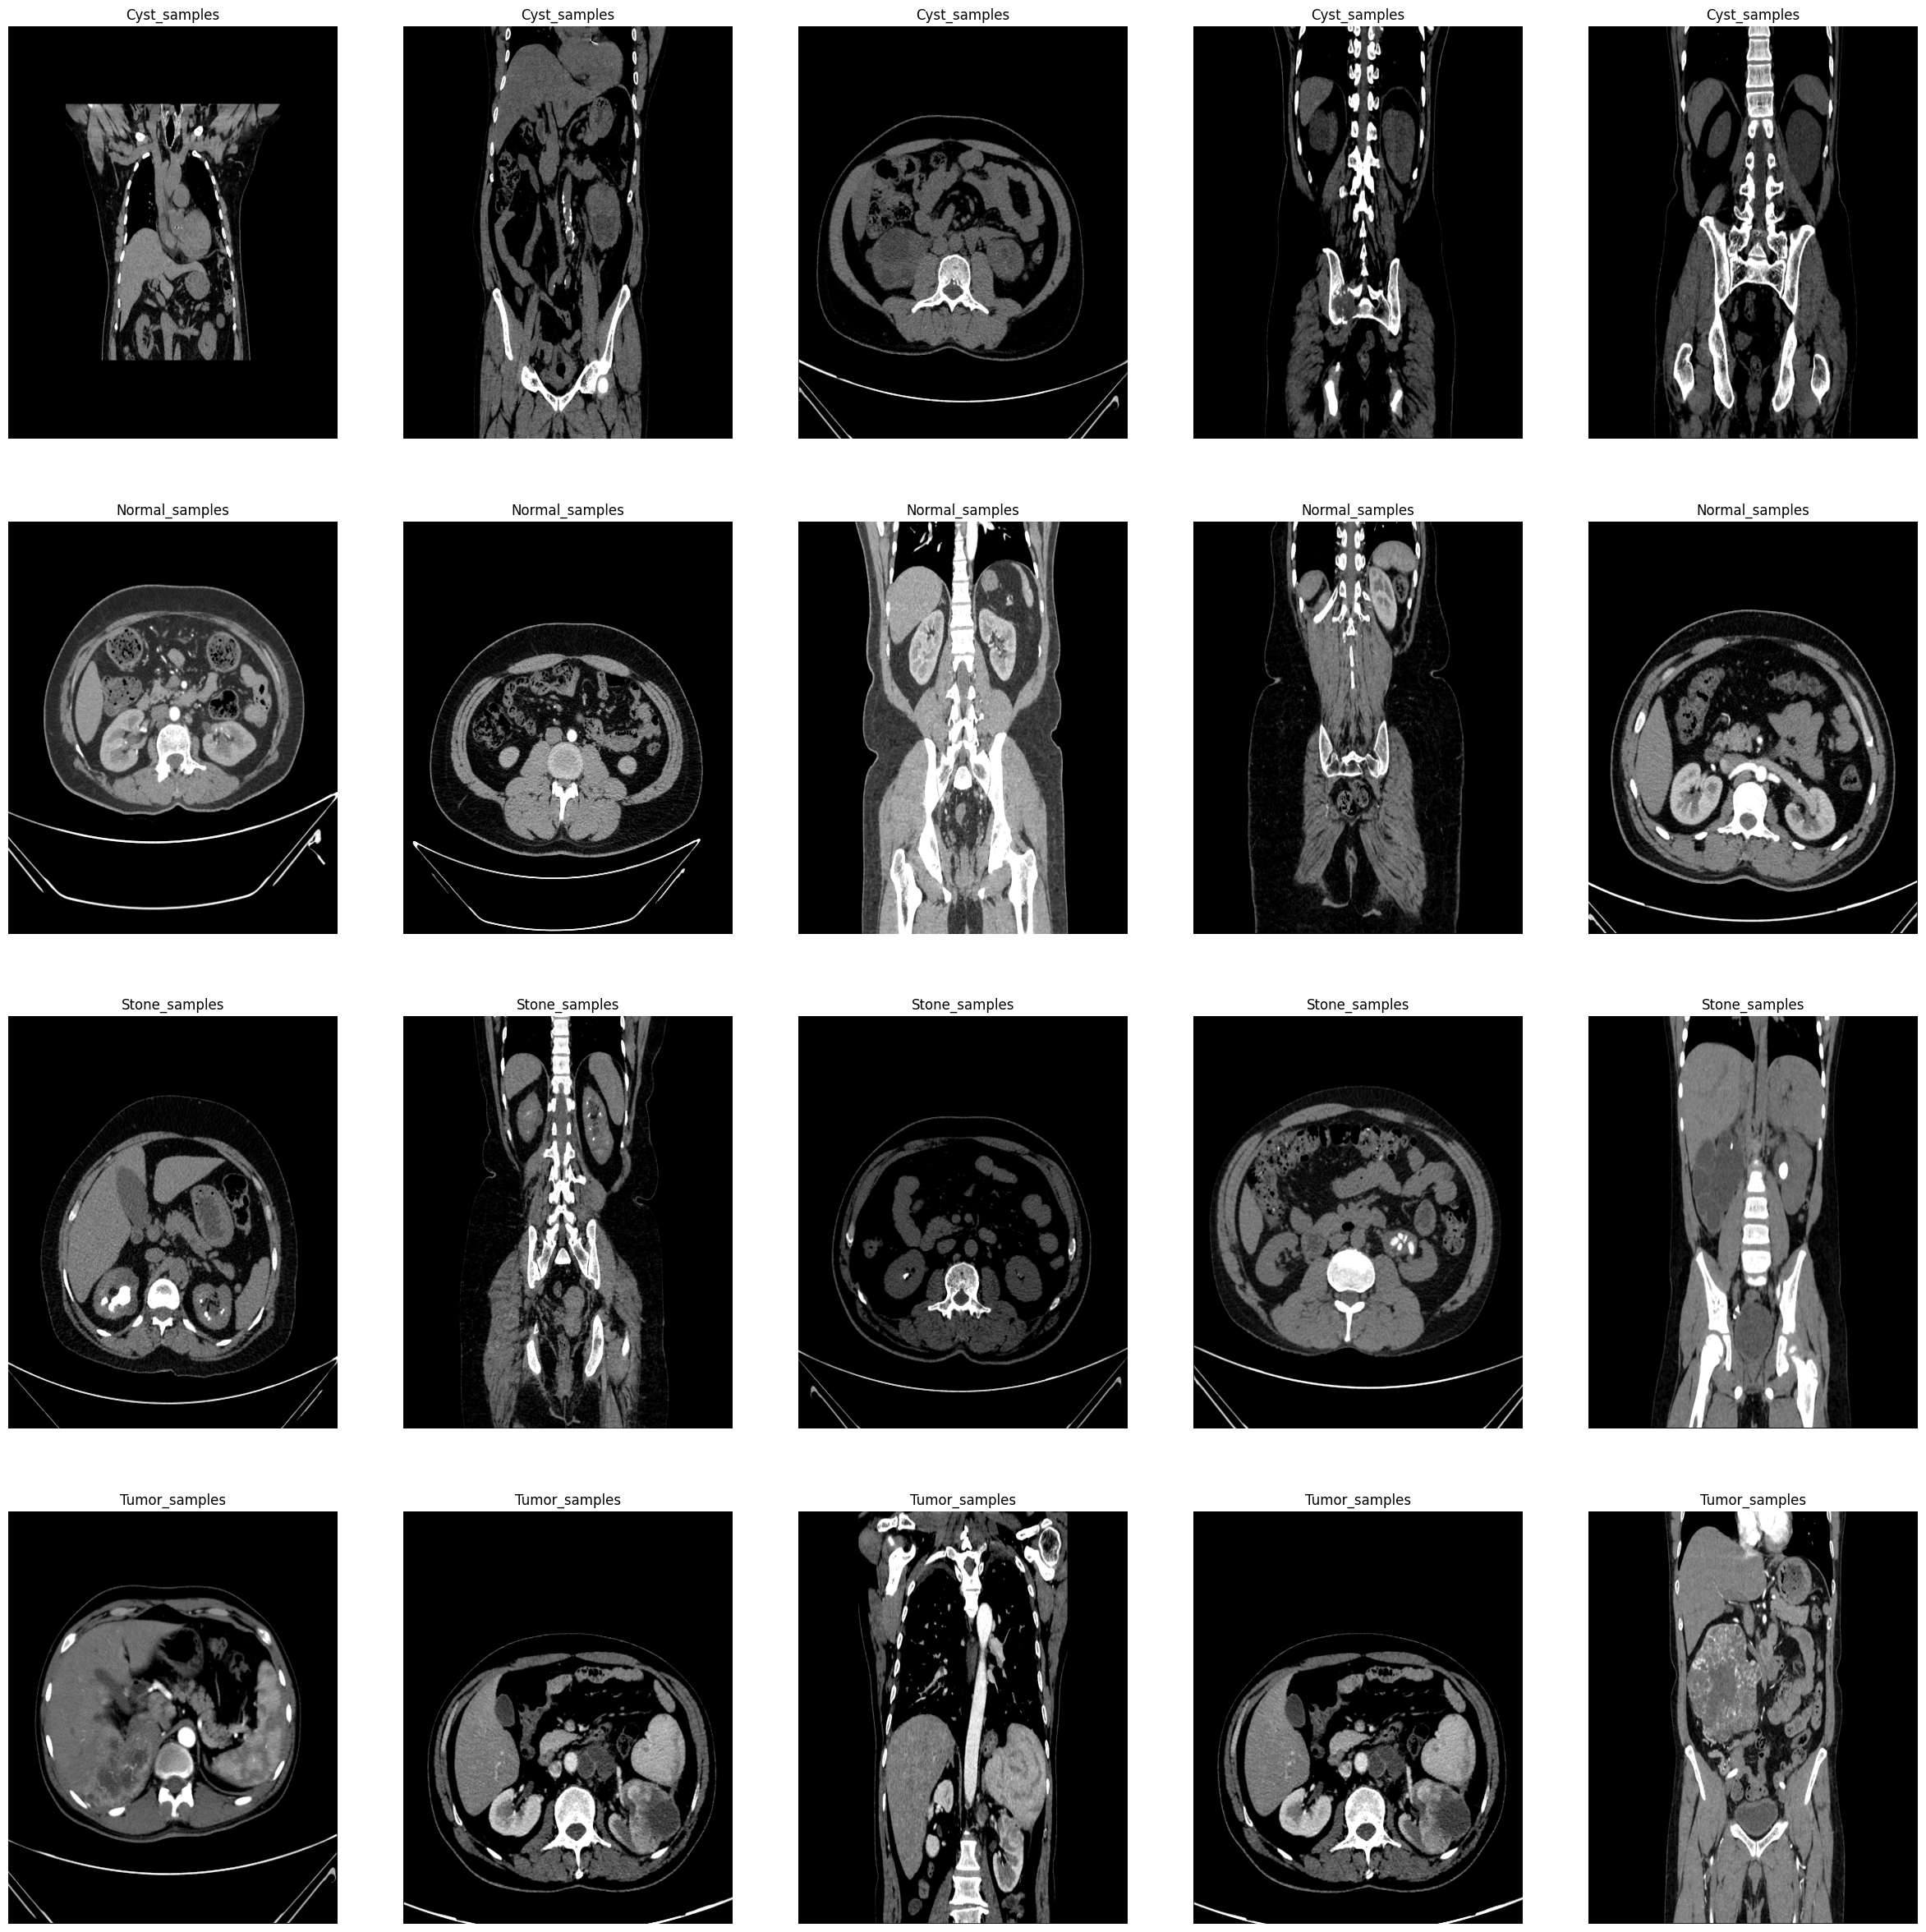

In [13]:
# Get few samples for both the classes
Cyst_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()
Normal_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
Stone_samples = (train_data[train_data['label']==2]['image'].iloc[:5]).tolist()
Tumor_samples = (train_data[train_data['label']==3]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = Cyst_samples + Normal_samples+Stone_samples+Tumor_samples
del Cyst_samples, Normal_samples,Stone_samples,Tumor_samples

# Plot the data 
f, ax = plt.subplots(4,5, figsize=(30,30))
for i in range(20):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Cyst_samples")
    elif i<10:
        ax[i//5, i%5].set_title("Normal_samples")
    elif i<15:
        ax[i//5, i%5].set_title("Stone_samples")
    elif i<20:
        ax[i//5, i%5].set_title("Tumor_samples")
    
        
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

# loading train image using cv2

In [15]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'Normal'
Cyst_cases_dir = train_dir / 'Cyst'
Stone_cases_dir = train_dir / 'Stone'
Tumor_cases_dir = train_dir / 'Tumor'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpg')
Cyst_cases = Cyst_cases_dir.glob('*.jpg')
Stone_cases = Stone_cases_dir.glob('*.jpg')
Tumor_cases = Tumor_cases_dir.glob('*.jpg')
train_data = []
train_labels = []
#from keras.utils.np_utils import to_categorical

for img in Cyst_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Cyst'
    train_data.append(img)
    train_labels.append(label)

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label ='Normal'
    train_data.append(img)
    train_labels.append(label)
                      
for img in Stone_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Stone'
    train_data.append(img)
    train_labels.append(label)
    
for img in Tumor_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Tumor'
    train_data.append(img)
    train_labels.append(label)
# Convert the list into numpy arrays

train_data1 = np.array(train_data)
train_labels1 = np.array(train_labels)

print("Total number of validation examples: ", train_data1.shape)
print("Total number of labels:", train_labels1.shape)

Total number of validation examples:  (12446, 28, 28, 3)
Total number of labels: (12446,)


In [17]:
train_data1.shape

(12446, 28, 28, 3)

In [18]:
train_data1[1]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.76862745, 0.76862745, 0.76862745],
        [0.        , 0.        , 0.        ],
        [0.        , 0

# Train output file convert list to csv file 

In [19]:
train_labels1 = pd.DataFrame(train_labels1, columns=[ 'label'],index=None)
train_labels1.head()

,label
0,Cyst
1,Cyst
2,Cyst
3,Cyst
4,Cyst


In [20]:
train_labels1['label'].unique()

array(['Cyst', 'Normal', 'Stone', 'Tumor'], dtype=object)

In [21]:
train_labels1['label']=train_labels1['label'].map({'Cyst':0,'Normal':1,
                                                   'Stone':2,'Tumor':3
                                                  })

In [22]:
train_labels1

,label
0,0
1,0
2,0
3,0
4,0
...,...
12441,3
12442,3
12443,3
12444,3


In [23]:
print(train_data1.shape)
print(train_labels1.shape)


(12446, 28, 28, 3)
(12446, 1)


In [24]:
train_labels1.isnull().sum()

label    0
dtype: int64

# Solving image dataset imbalance using SMOTE

In [27]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
train_rows=len(train_data1)
train_data1 = train_data1.reshape(train_rows,-1)
train_data2, train_labels2 = smt.fit_resample(train_data1, train_labels1)

label
0    5077
1    5077
2    5077
3    5077
Name: count, dtype: int64


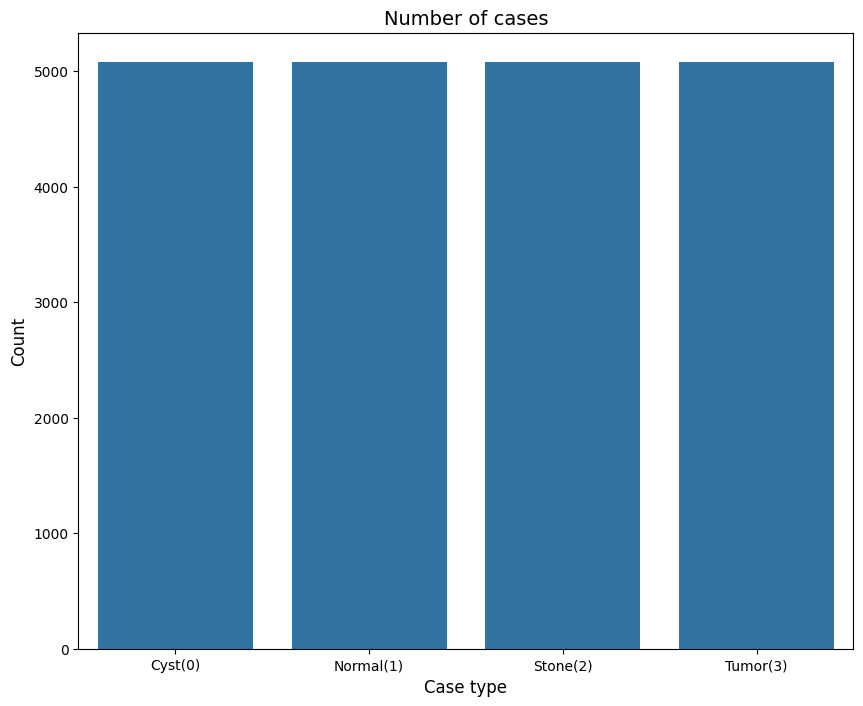

In [29]:
cases_count1 = train_labels2['label'].value_counts()
print(cases_count1)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count1.index, y= cases_count1.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Cyst(0)','Normal(1)', 'Stone(2)', 'Tumor(3)'])
plt.show()

In [30]:
train_data2.shape

(20308, 2352)

In [31]:
train_labels2.shape

(20308, 1)

In [32]:
train_labels2['label'].value_counts()

label
0    5077
1    5077
2    5077
3    5077
Name: count, dtype: int64

In [33]:
train_data2 =train_data2.reshape(-1,28,28,3)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size=0.23, random_state=42)


In [35]:
#import imblearn
#from imblearn.over_sampling import RandomOverSampler
#oversample =  RandomOverSampler(random_state=42)
#train_data2, train_labels2 = oversample.fit_resample(train_data1, train_labels1)

# **Augmentation
Data augmentation is a powerful technique which helps in almost every case for improving the robustness of a model. But augmentation can be much more helpful where the dataset is imbalanced. You can generate different samples of undersampled class in order to try to balance the overall distribution.

In [36]:
import tensorflow as tf
data_augmentation=tf.keras.preprocessing.image.ImageDataGenerator(
   rotation_range=30, horizontal_flip=True)

In [37]:


#from tensorflow import keras
#from tensorflow.keras import layers
#data_augmentation = keras.Sequential(
  #[
  #  layers.RandomFlip("horizontal",
  #                    input_shape=(28,
  #                                28,
   #                               3)),
 #   layers.RandomRotation(0.1),
#    layers.RandomZoom(0.1),
#  ]
#)

# Create the model

In [38]:
import tensorflow as tf
from tensorflow.keras import  layers, models

model = models.Sequential([
    #data_augmentation,
    layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)) ,
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
    
])

model.summary()

C:\Users\diyaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 28)          │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          16,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,904 (210.56 KB)

 Trainable params: 53,904 (210.56 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.add(layers.Flatten())
model.add(layers.Dense(640, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(264, activation='tanh'))
model.add(layers.Dense(64, activation='sigmoid'))

model.add(layers.Dense(4))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 28)          │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          16,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 640)                 │         369,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 640)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 264)                 │         169,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 609,628 (2.33 MB)

 Trainable params: 609,628 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(np.array(X_train), np.array(y_train), epochs=100, validation_data=(np.array(X_test), np.array(y_test)))
#model.fit(np.array(train_data1), np.array(train_labels1), epochs=10)

Epoch 1/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6662 - loss: 0.7466 - val_accuracy: 0.9750 - val_loss: 0.0894
Epoch 2/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9854 - loss: 0.0538 - val_accuracy: 0.9942 - val_loss: 0.0284
Epoch 3/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9877 - loss: 0.0424 - val_accuracy: 0.9917 - val_loss: 0.0277
Epoch 4/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9919 - loss: 0.0277 - val_accuracy: 0.9953 - val_loss: 0.0159
Epoch 5/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9938 - loss: 0.0191 - val_accuracy: 0.9998 - val_loss: 0.0029
Epoch 6/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9985 - loss: 0.0070 - val_accuracy: 0.9964 - val_loss: 0.0179
Epoch 7/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9932 - loss: 0.0241 - val_accuracy: 0.9972 - val_loss: 0.0084
Epoch 8/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9977 - loss: 0.0100 - 

# Testing the a image with sample data

In [41]:
import cv2
import numpy as np
pic = []
img = cv2.imread(r"C:\Users\diyaa\Downloads\LIME\tumour.jpeg")

img = cv2.resize(img, (28,28))

if img.shape[2] == 1:
    img = np.dstack([img, img, img])

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.array(img) / 255.0

pic.append(img)

print("Image loaded successfully!")



Image loaded successfully!


In [3]:
!pip uninstall tensorflow -y
!pip install tensorflow


Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0
  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl (375.9 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


im

In [42]:
pic1 = np.array(pic)

In [46]:
a = model.predict(pic1)
predicted_class = np.argmax(a)  # Assuming 'a' is a probability distribution
print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted class: 3


In [60]:
import cv2
import numpy as np

pic = []
img_path = "/kaggle/input/testtt/stone.png"  # Corrected path

# Read the image
img = cv2.imread(img_path)

# Check if the image was loaded properly
if img is None:
    print("Error: Image not found. Check the file path.")
else:
    img = cv2.resize(img, (28, 28))  # Resize to (28, 28)
    
    # Ensure it's a 3-channel image
    if len(img.shape) == 2 or img.shape[2] == 1:
        img = np.dstack([img, img, img])

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = img / 255.0  # Normalize pixel values
    pic.append(img)

    print("Image successfully loaded and preprocessed.")


Image successfully loaded and preprocessed.


In [61]:
import numpy as np

# Convert the list to a NumPy array
pic1 = np.array(pic)

# Ensure the model receives the correct input shape
if pic1.shape[0] == 0:
    print("Error: No images found in 'pic'. Ensure the image is loaded correctly.")
else:
    # Make predictions
    predictions = model.predict(pic1)
    
    # Get the class with the highest probability
    predicted_class = np.argmax(predictions)
    
    print("Predicted class:", predicted_class)


Predicted class: 2


In [33]:
a.argmax()

0

In [ ]:
#datagen = ImageDataGenerator()
#datagen.fit(train)
#X_batch, y_batch = datagen.flow(X_train, y_train, batch_size=batch_size)
#model.fit_generator(datagen, samples_per_epoch=len(train), epochs=epochs)

In [45]:
model.save('new_diya_kidney_model.keras')  # Saves in the new Keras format


In [35]:
new_model = tf.keras.models.load_model('kidney_model')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 640)               3

In [36]:
a=new_model.predict(pic1)
a

array([[  6.337275 , -11.455687 ,  -8.5906105,  -8.8072   ]],
      dtype=float32)

In [ ]:
np.argmax(a)

In [ ]:
image='../input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1001).jpg'
img = cv2.imread(str(image))
# Importing Image module from PIL package 
from PIL import Image 
import PIL 
  
# creating a image object (main image) 
im1 = Image.open(image) 
  
# save a image using extension
im1 = im1.save("kidney_tumor.jpg")